## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split  

In [10]:
import os
for dirname, _, filenames in os.walk('C:/Users/manirudh/Downloads/rossmann-store-sales'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/manirudh/Downloads/rossmann-store-sales\sample_submission.csv
C:/Users/manirudh/Downloads/rossmann-store-sales\store.csv
C:/Users/manirudh/Downloads/rossmann-store-sales\test.csv
C:/Users/manirudh/Downloads/rossmann-store-sales\train.csv


## Loading the data

In [12]:
store = pd.read_csv("C:/Users/manirudh/Downloads/rossmann-store-sales/store.csv")
train = pd.read_csv("C:/Users/manirudh/Downloads/rossmann-store-sales/train.csv")
test = pd.read_csv("C:/Users/manirudh/Downloads/rossmann-store-sales/test.csv",parse_dates=[3])

C:\Users\manirudh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Dimensions of the data

In [14]:
train.shape

(1017209, 9)

In [16]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [17]:
test.shape

(41088, 8)

## Viewing 5 rows of data

In [19]:
test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [21]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


## Statistical Summary

In [22]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [23]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


## Converting the Date into Date-Time and Store's Data

1
(942, 9)


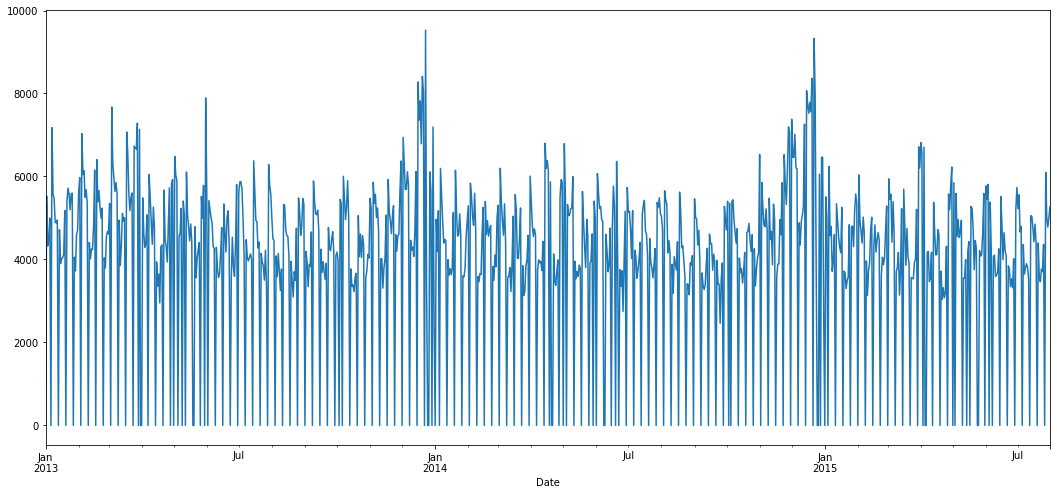

In [28]:
#date wise line plot for sales
train['Date'] = pd.to_datetime(train['Date'],format = '%Y-%m-%d')
store_id = train.Store.unique()[0]
print(store_id)
store_rows = train[train['Store'] == store_id]
print(store_rows.shape)
store_rows.resample('1D',on = 'Date')['Sales'].sum().plot.line(figsize = (18,8))


## Converting the Date into Date-Time

In [29]:
test['Date'] = pd.to_datetime(test['Date'],format = '%Y-%m-%d')
store_test_rows = test[test['Store'] == store_id]
print(store_test_rows.shape)
store_test_rows['Date'].min(), store_test_rows['Date'].max()

(48, 8)


(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Plotting Sales data

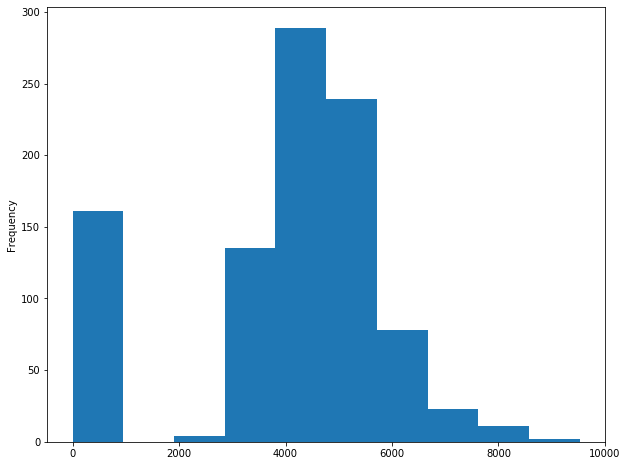

In [31]:
store_rows['Sales'].plot.hist(figsize = (10,8))

## Missing Values

In [32]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Class Distribution

In [35]:
train.groupby('Store').size()
test.groupby('Store').size()

Store
1       48
3       48
7       48
8       48
9       48
        ..
1111    48
1112    48
1113    48
1114    48
1115    48
Length: 856, dtype: int64

In [38]:
store[~store['Promo2SinceYear'].isna()].iloc[0]

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

## Filling NA Values

In [39]:

store['Promo2SinceWeek'].fillna(0,inplace = True)
store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode()[0],inplace = True)
store['PromoInterval'].fillna(store['PromoInterval'].mode()[0],inplace = True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0],inplace = True)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].max(),inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0],inplace = True)
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [40]:
data_merged = train.merge(store,on = 'Store',how = 'left')
print(train.shape)
print(data_merged.shape)
print(data_merged.isnull().sum().sum())

(1017209, 9)
(1017209, 18)
0


## Merging the data

In [41]:
data_merged['day'] = data_merged['Date'].dt.day
data_merged['month'] = data_merged['Date'].dt.month
data_merged['year'] = data_merged['Date'].dt.year
data_merged['StateHoliday'] = data_merged['StateHoliday'].map({'a':1,'b':2,'c':3,'0':0,0:0})
data_merged['StateHoliday'] = data_merged['StateHoliday'].astype(int)
data_merged['Assortment'] = data_merged['Assortment'].map({'a':1,'b':2,'c':3})
data_merged['Assortment'] = data_merged['Assortment'].astype(int)
data_merged['StoreType'] = data_merged['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
data_merged['StoreType'] = data_merged['StoreType'].astype(int)
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
data_merged['PromoInterval'] = data_merged['PromoInterval'].map(map_promo)

## Train Test Split

In [47]:
features = data_merged.columns.drop(['Sales','Date'])
X = data_merged[features]
y = np.log(data_merged['Sales']+1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [49]:
model_dt  = DecisionTreeRegressor(max_depth = 20, random_state = 42).fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

## r2_ Score( Co-effecient of Determination)

In [50]:
r2_score(y_test,y_pred)

0.9994365189362401

In [51]:
train_avg_cust = train.groupby(['Store'])[['Customers']].mean().reset_index().astype(int)
test_1 = test.merge(train_avg_cust,on = 'Store',how = 'left')
test.shape,test_1.shape


((41088, 8), (41088, 9))

## Testing the Merged Data

In [52]:
test_merged = test_1.merge(store,on = 'Store',how = 'left')
test_merged['Open'] = test_merged['Open'].fillna(1)
test_merged['Date'] = pd.to_datetime(test_merged['Date'],format = '%Y-%m-%d')
test_merged['day'] = test_merged['Date'].dt.day
test_merged['month'] = test_merged['Date'].dt.month
test_merged['year'] = test_merged['Date'].dt.year
test_merged['StateHoliday'] = test_merged['StateHoliday'].map({'0':0,'a':1})
test_merged['StateHoliday'] = test_merged['StateHoliday'].astype(int)
test_merged['Assortment'] = test_merged['Assortment'].map({'a':1,'b':2,'c':3})
test_merged['Assortment'] = test_merged['Assortment'].astype(int)
test_merged['StoreType'] = test_merged['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
test_merged['StoreType'] = test_merged['StoreType'].astype(int)
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
test_merged['PromoInterval'] = test_merged['PromoInterval'].map(map_promo)

## Predicting on Features

In [53]:
test_pred = model_dt.predict(test_merged[features])